In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Example: Load stock data (e.g., IBM)
IBM_stock_data = yf.download('IBM', start='2024-01-01', end='2024-10-31')

# Generate sine wave data
T = 500
time = np.linspace(0, 10, T)
sine_data = np.sin(time)

[*********************100%***********************]  1 of 1 completed


In [4]:
print(IBM_stock_data.head(3))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  162.830002  163.289993  160.460007  161.500000  157.093857   
2024-01-03  161.000000  161.729996  160.080002  160.100006  155.732071   
2024-01-04  160.220001  161.809998  160.169998  160.860001  156.471329   

             Volume  
Date                 
2024-01-02  3825000  
2024-01-03  4086100  
2024-01-04  3212000  


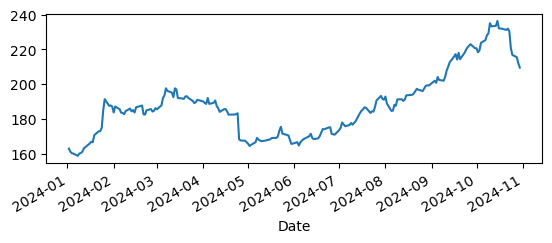

In [5]:
IBM_stock_data['Open'].plot(subplots=True, layout=(2,1));

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = IBM_stock_data[0:int(len(IBM_stock_data)*0.9)], IBM_stock_data[int(len(IBM_stock_data)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0)) 
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_3178/3248465692.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [17]:
model_fit.forecast(10)

array([220.62817713, 220.62801   , 220.62799472, 220.62799333,
       220.6279932 , 220.62799319, 220.62799319, 220.62799319,
       220.62799319, 220.62799319])

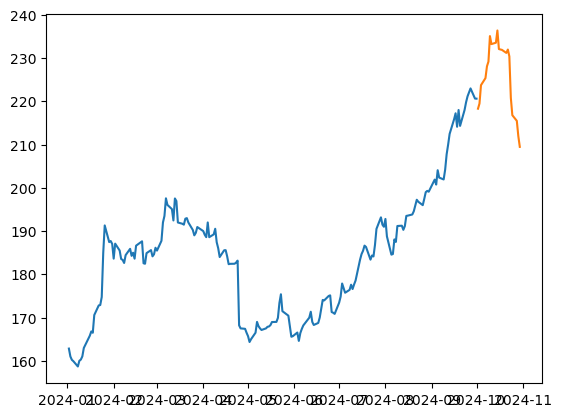

In [12]:
plt.plot(train_data['Open'])
plt.plot(test_data['Open'])
# plt.plot(history)

In [6]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_2930/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [7]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 10.547176393906936
MAE: 2.4265506843624705
RMSE: 3.2476416664876893


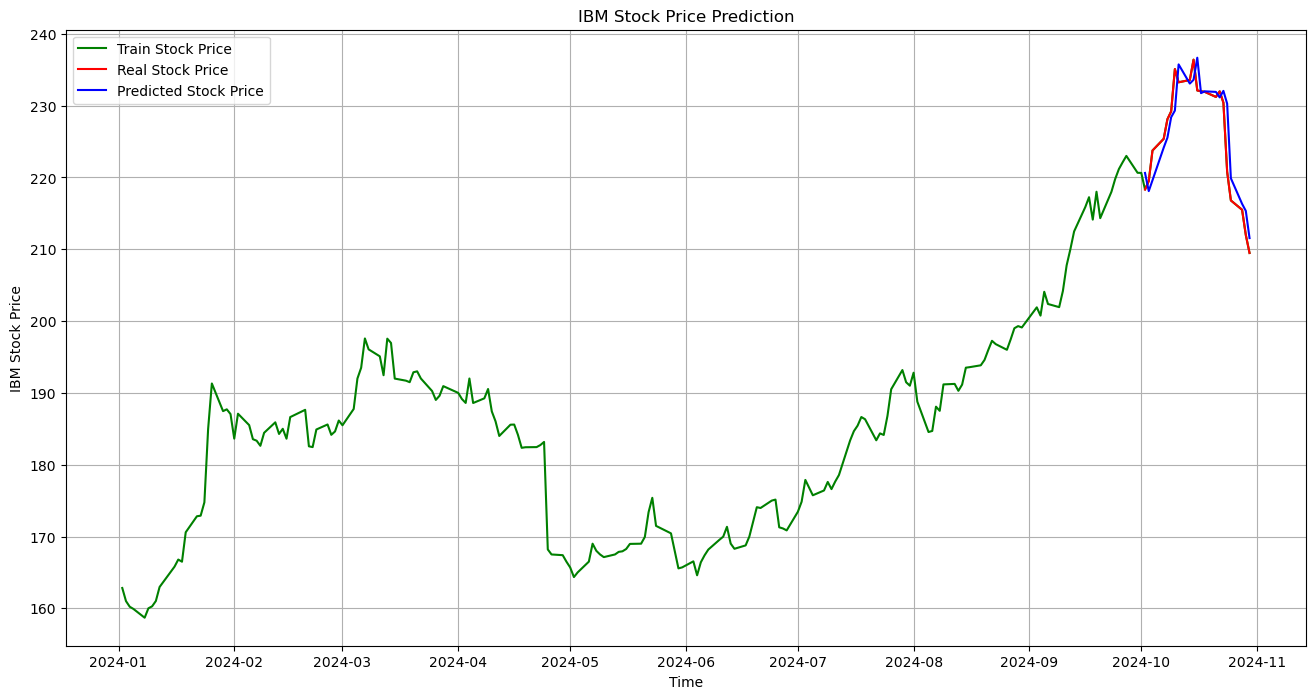

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(IBM_stock_data.index[-600:], IBM_stock_data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

# 1. Moving Average (MA) model

In [9]:
def moving_average(data, q):
    """Compute the Moving Average (MA) model of order q."""
    ma_series = np.zeros_like(data)
    for t in range(q, len(data)):
        ma_series[t] = np.mean(data[t-q:t])
    return ma_series


# 2. Autoregression (AR) model 

In [10]:
def autoregression(data, p):
    """Compute the Autoregressive (AR) model of order p."""
    ar_series = np.zeros_like(data)
    for t in range(p, len(data)):
        ar_series[t] = np.dot(data[t-p:t][::-1], np.ones(p) / p)  # Averaged AR coefficients
    return ar_series


# 3.ARMA model

In [11]:
def arma(data, p, q):
    """Compute the ARMA model of order (p, q)."""
    ar_part = autoregression(data, p)
    ma_part = moving_average(data, q)
    return ar_part + ma_part


# Time Series Analysis Using ARMA, ARIMA, and SARIMA Models 

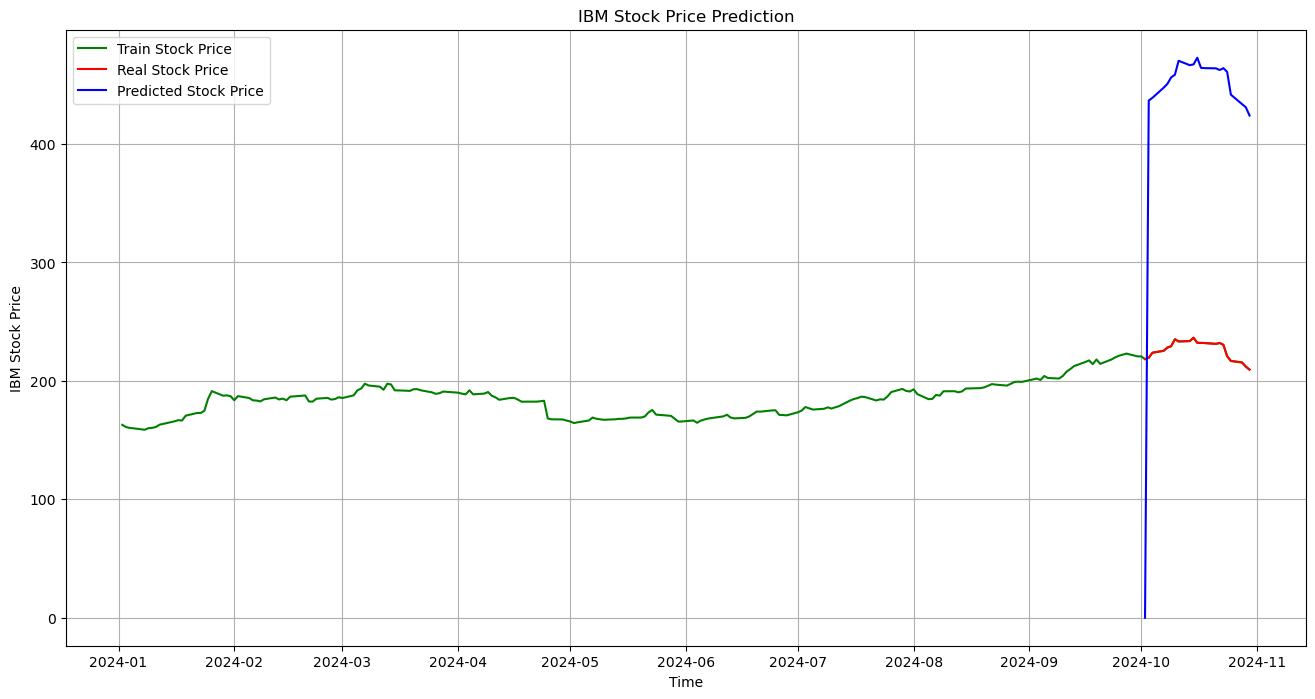

In [15]:
# plot the ARMA model using def arma(data, p, q)
plt.figure(figsize=(16,8))
plt.plot(IBM_stock_data.index[-600:], IBM_stock_data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, arma(y, 1, 1), color = 'blue', label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arma_model.pdf')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  210
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -489.676
Date:                Fri, 01 Nov 2024   AIC                            991.353
Time:                        10:19:45   BIC                           1011.435
Sample:                             0   HQIC                           999.471
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        184.4882      8.429     21.886      0.000     167.967     201.009
ar.L1          1.9830      0.043     46.063      0.000       1.899       2.067
ar.L2         -0.9846      0.042    -23.447      0.0

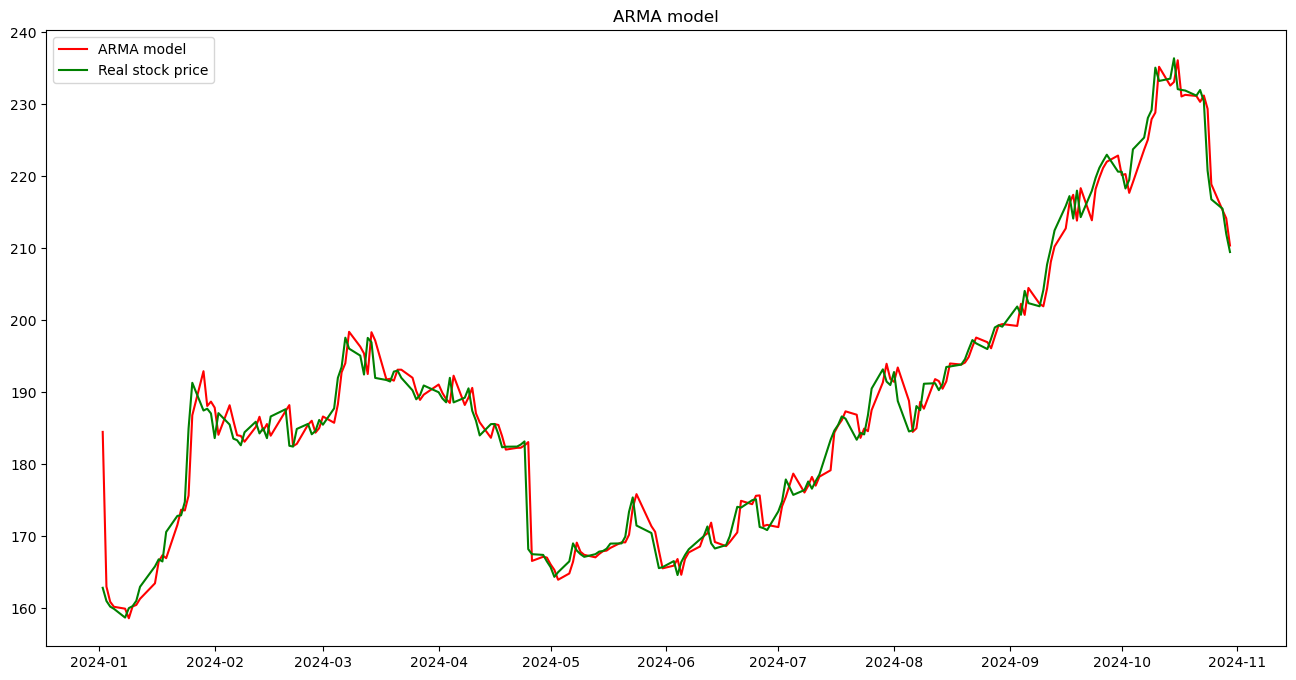

In [14]:
import statsmodels.api as sm

# ARMA model
arma_model = sm.tsa.ARIMA(IBM_stock_data['Open'], order=(2, 0, 2)).fit()
print(arma_model.summary())

# Plot the ARMA model
plt.figure(figsize=(16,8))
plt.plot(arma_model.fittedvalues, color='red', label='ARMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('ARMA model')
plt.legend()
plt.show()


# ARIMA model

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  210
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -486.903
Date:                Fri, 01 Nov 2024   AIC                            983.806
Time:                        10:22:25   BIC                           1000.517
Sample:                             0   HQIC                           990.562
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1696      0.533      0.318      0.750      -0.875       1.215
ar.L2          0.6208      0.340      1.825      0.068      -0.046       1.287
ma.L1         -0.0339      0.511     -0.066      0.9

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


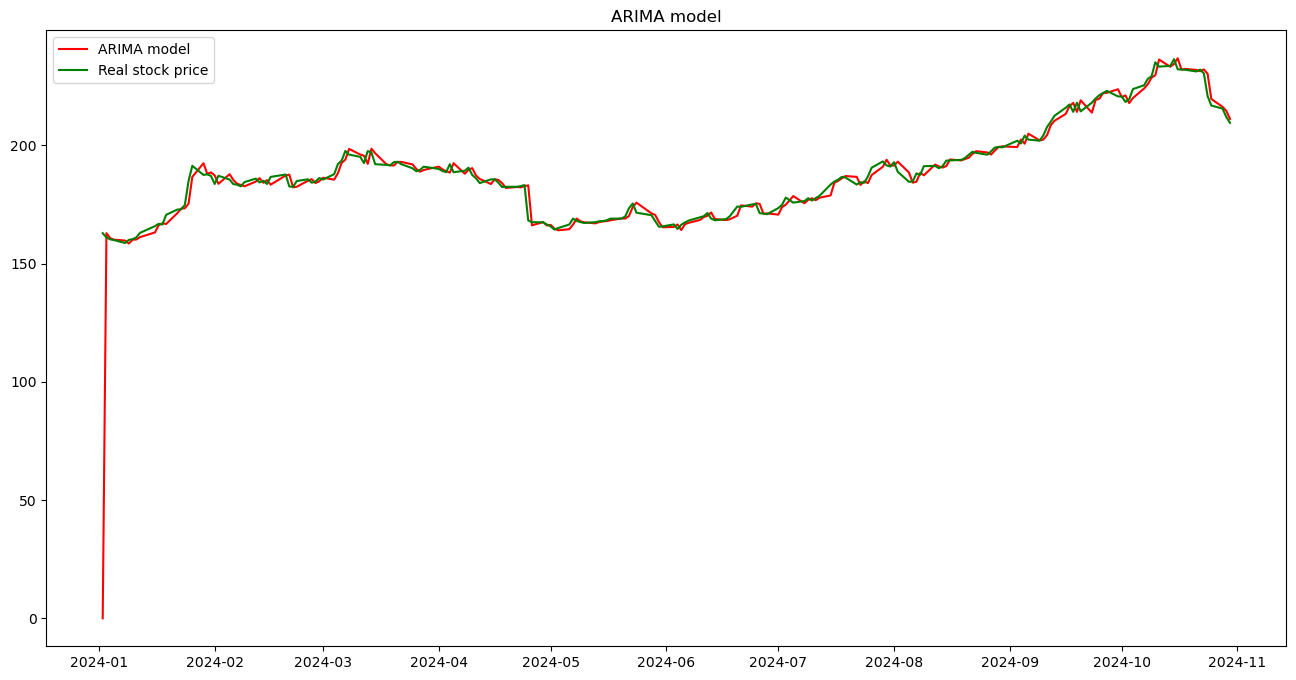

In [17]:
# ARIMA model
arima_model = sm.tsa.ARIMA(IBM_stock_data['Open'], order=(2, 1, 2)).fit()
print(arima_model.summary())

#plot the ARIMA model
plt.figure(figsize=(16,8))
plt.plot(arima_model.fittedvalues, color='red', label='ARIMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('ARIMA model')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37131D+00    |proj g|=  9.34301D-02

At iterate    5    f=  2.27795D+00    |proj g|=  2.60822D-02

At iterate   10    f=  2.27007D+00    |proj g|=  8.41705D-03

At iterate   15    f=  2.26892D+00    |proj g|=  9.18722D-03

At iterate   20    f=  2.26792D+00    |proj g|=  1.15431D-03

At iterate   25    f=  2.26712D+00    |proj g|=  1.06480D-02

At iterate   30    f=  2.26685D+00    |proj g|=  5.11621D-04

At iterate   35    f=  2.26685D+00    |proj g|=  1.12815D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

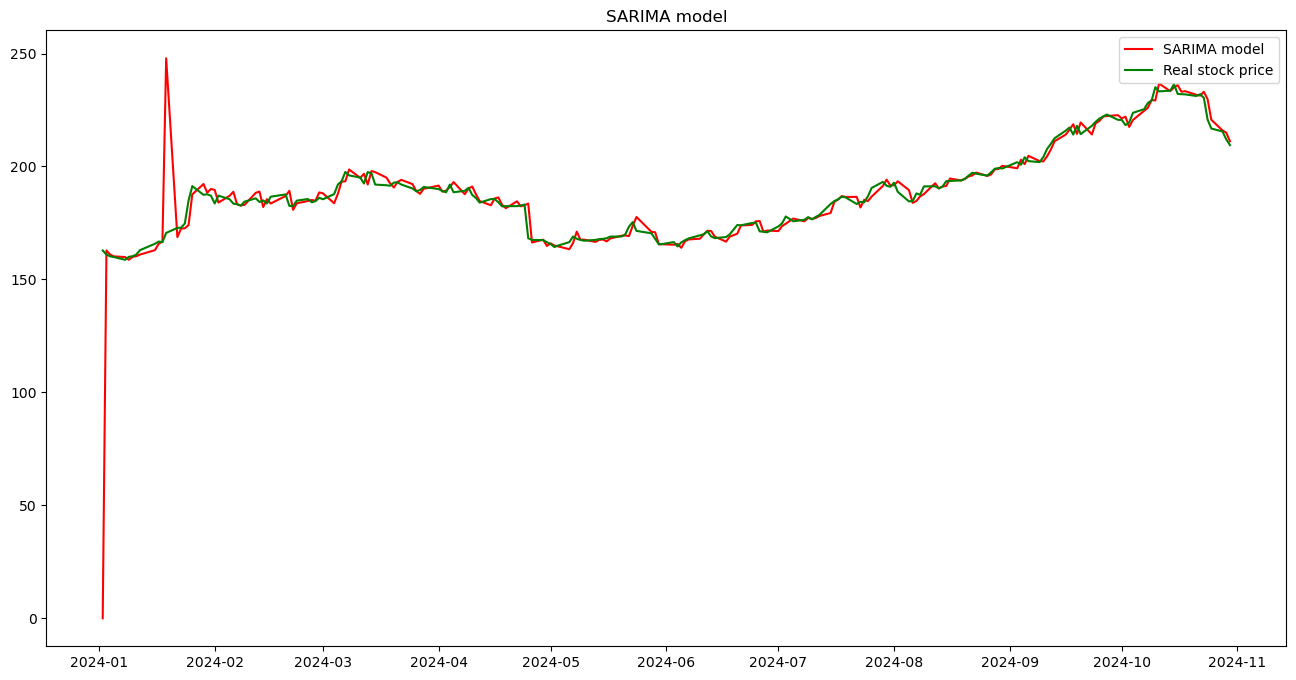

In [18]:
# SARIMA model 
sarima_model = sm.tsa.SARIMAX(IBM_stock_data['Open'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_model.summary())

#plot the SARIMA model
plt.figure(figsize=(16,8))
plt.plot(sarima_model.fittedvalues, color='red', label='SARIMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('SARIMA model')
plt.legend()
plt.show()
